In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc

# Load the dataset

In [3]:
df = pd.read_csv('credit_card_transactions.csv')

# Explore the dataset

In [4]:
print(df.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

# Check for missing values

In [5]:
print(df.isnull().sum())


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [7]:
# Data preprocessing and normalization
# Assuming that the dataset has been preprocessed and normalized

# Handle class imbalance using undersampling

In [8]:
fraud_df = df[df['Class'] == 1]
non_fraud_df = df[df['Class'] == 0].sample(n=len(fraud_df), random_state=42) 
balanced_df = pd.concat([fraud_df, non_fraud_df])

# Visualize class imbalance

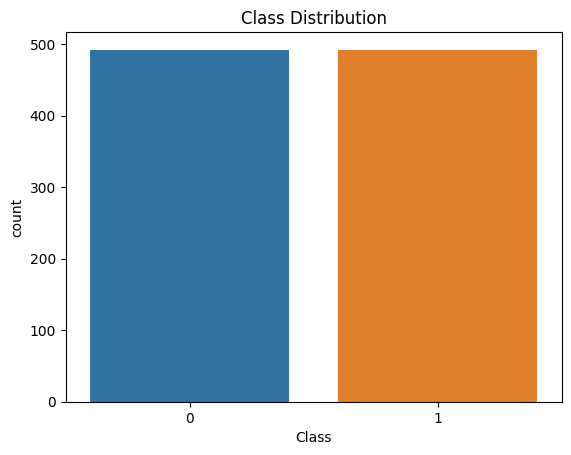

In [9]:
sns.countplot(x='Class', data=balanced_df)
plt.title('Class Distribution')
plt.show()


# Visualize the correlation between the features and the class label

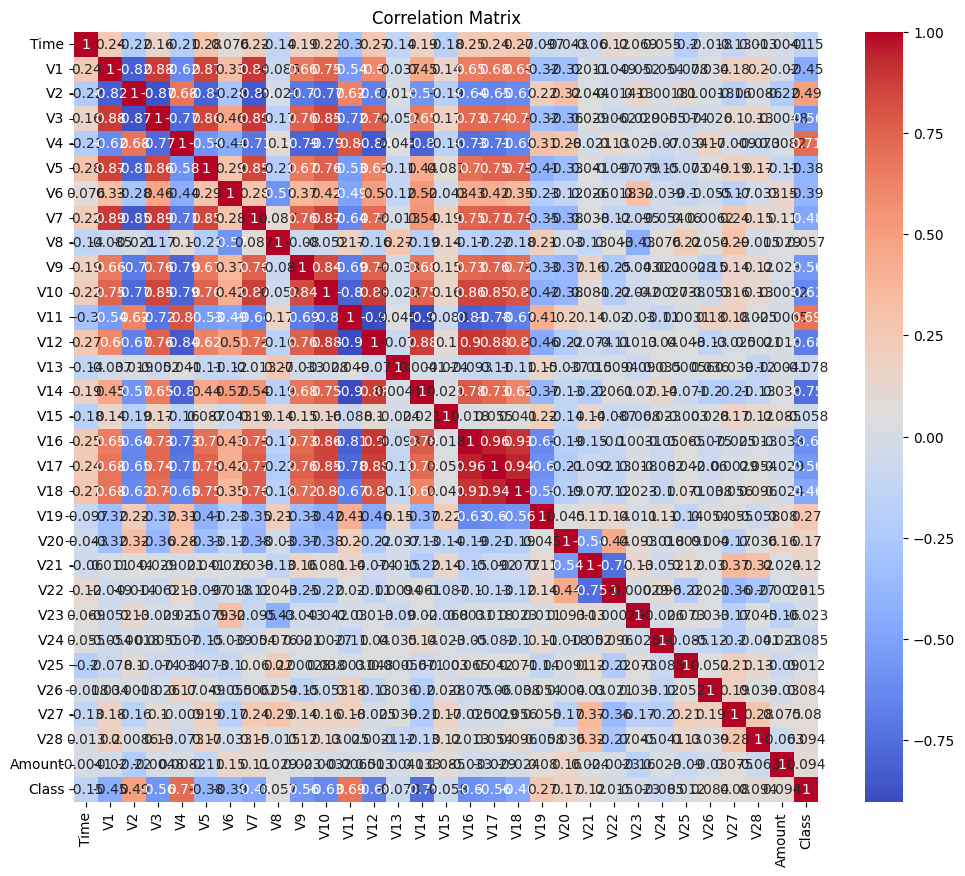

In [10]:
plt.figure(figsize=(12,10))
sns.heatmap(balanced_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Visualize the distribution of each feature

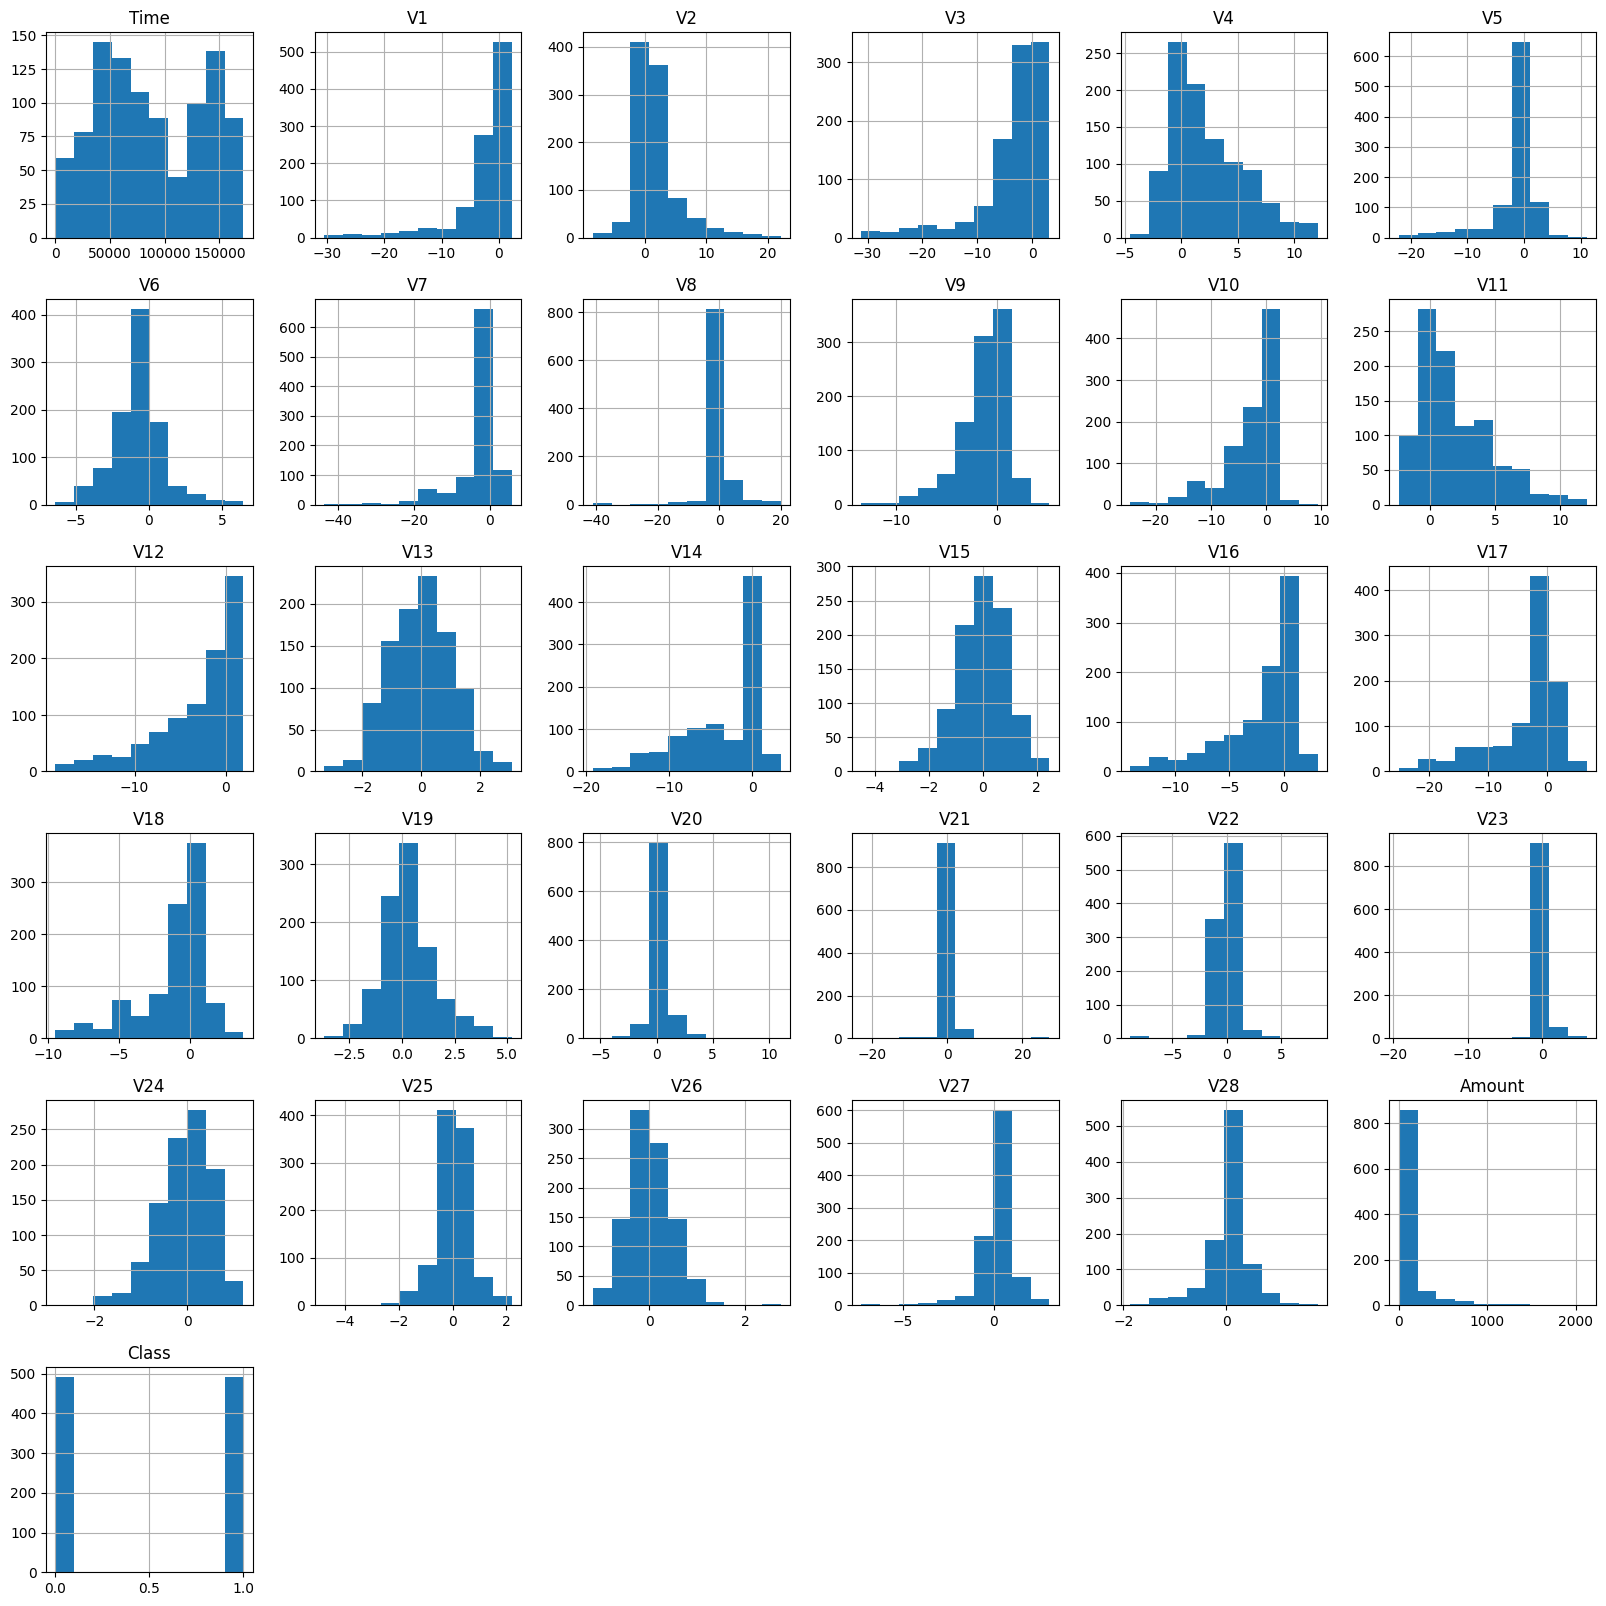

In [11]:
balanced_df.hist(figsize=(20,20))
plt.show()


# Split the dataset into training and testing sets

In [12]:
X = balanced_df.drop(['Class'], axis=1)
y = balanced_df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Train the logistic regression model

In [13]:
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

# Make predictions

In [14]:
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:,1] 

# Evaluate the model's performance

In [15]:
confusion = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [16]:
print('Confusion Matrix:')
print(confusion)
print('Precision:', precision)
print('Recall:', recall)
print('F1-Score:', f1)

Confusion Matrix:
[[97  1]
 [10 89]]
Precision: 0.9888888888888889
Recall: 0.898989898989899
F1-Score: 0.9417989417989419


# Visualize the ROC curve and the AUC score

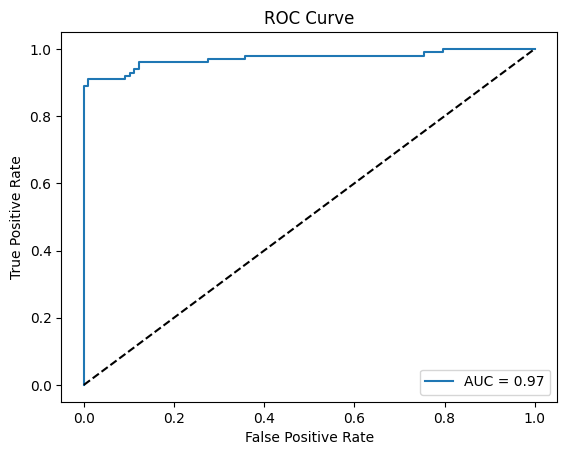

In [17]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob) 
auc_score = auc(fpr, tpr)
plt.plot(fpr, tpr, label='AUC = %.2f' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Use cross-validation to improve the model's generalization

In [18]:
cv_scores = cross_val_score(model, X, y, cv=5)
print('Cross-Validation Scores:')
print(cv_scores)
print('Mean Cross-Validation Score:', np.mean(cv_scores))

Cross-Validation Scores:
[0.94923858 0.92893401 0.89340102 0.92385787 0.89795918]
Mean Cross-Validation Score: 0.9186781311509374


D:\program\python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
